In [400]:
#Environment conda python 3.6

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [237]:
df = pd.read_csv('parliament.csv')
df.head(5)

,YEAR,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
0,1951,AJMER,AJMER NORTH,JAWALA PRASHAD,NaN,INC,NaN,NaN,46679,162327.0,1
1,1951,AJMER,AJMER NORTH,CHAND KARAN,NaN,BJS,NaN,NaN,28990,162327.0,2
2,1951,AJMER,AJMER NORTH,DINO MAL,NaN,PURP,NaN,NaN,10778,162327.0,3
3,1951,AJMER,AJMER NORTH,BAJORIA BADRIDAS,NaN,IND,NaN,NaN,6153,162327.0,4
4,1951,AJMER,AJMER NORTH,RANG RAJ MEHTA,NaN,IND,NaN,NaN,4565,162327.0,5


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74930 entries, 0 to 74929
Data columns (total 11 columns):
YEAR        74930 non-null int64
STATE       74930 non-null object
PC          74930 non-null object
NAME        74930 non-null object
SEX         71462 non-null object
PARTY       74930 non-null object
AGE         13505 non-null float64
CATEGORY    13505 non-null object
VOTES       74930 non-null int64
ELECTORS    69495 non-null float64
#           74930 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 6.3+ MB


In [239]:
df.isnull().sum()

YEAR            0
STATE           0
PC              0
NAME            0
SEX          3468
PARTY           0
AGE         61425
CATEGORY    61425
VOTES           0
ELECTORS     5435
#               0
dtype: int64

In [240]:
years = df['YEAR'].unique()
years

array([1951, 1957, 1962, 1967, 1971, 1977, 1980, 1984, 1985, 1989, 1991,
       1992, 1996, 1998, 1999, 2004, 2009])

In [241]:
#analysis for 1999 elections
data_1999 = df.loc[df['YEAR'] == 1999]
data_1999 = data_1999.drop('YEAR',1)

In [191]:
states = data_1999['STATE'].unique()
len(states)

32

In [192]:
#Total Electors
print '{0:,}'.format(data_1999["ELECTORS"].unique().sum())

619,536,847.0


In [193]:
#Total Votes
print '{0:,}'.format(data_1999["VOTES"].sum())

364,437,294


In [242]:
states = pd.DataFrame(data_1999["STATE"].unique(), columns=["State"])
print "The number of states: %s" % len(states)
states

The number of states: 32


,State
0,A&N ISLANDS
1,ANDHRA PRADESH
2,ARUNACHAL PRADESH
3,ASSAM
4,BIHAR
5,CHANDIGARH
6,D&N HAVELI
7,DAMAN & DIU
8,GOA
9,GUJARAT


In [243]:
# Calculating constituencies
data_1999.groupby('STATE')['PC'].nunique().reset_index()
winners = data_1999[data_1999['#']==1]
seats = winners['STATE'].value_counts()

In [244]:
#total number of constituencies
sum(seats)

543

In [245]:
seats.sort_index().values

array([ 1, 42,  2, 14, 54,  1,  1,  1,  2, 26, 10,  4,  6, 28, 20,  1, 40,
       48,  2,  2,  1,  1,  7, 21,  1, 13, 25,  1, 39,  2, 85, 42])

In [198]:
states['Seats'] = seats.sort_index().values

In [199]:
states.sort_values('Seats', ascending=False)

,State,Seats
30,UTTAR PRADESH,85
4,BIHAR,54
17,MAHARASHTRA,48
31,WEST BENGAL,42
1,ANDHRA PRADESH,42
16,MADHYA PRADESH,40
28,TAMIL NADU,39
13,KARNATAKA,28
9,GUJARAT,26
26,RAJASTHAN,25


In [248]:
total_electors = pd.pivot_table(winners, values="ELECTORS", index=["STATE"], aggfunc="sum")
total_votes = pd.pivot_table(data_1999, values="VOTES", index=["STATE"], aggfunc="sum")
states["Total Electors"] = total_electors.sort_index().values/1000
states["Total Votes"] = total_votes.sort_index().values/1000
states.sort_values("Total Electors", ascending=False)

,State,Total Electors,Total Votes
30,UTTAR PRADESH,102946.404,54348
4,BIHAR,58788.098,35652
17,MAHARASHTRA,56853.196,33031
1,ANDHRA PRADESH,49654.389,33365
28,TAMIL NADU,47733.664,27231
31,WEST BENGAL,47649.856,35292
16,MADHYA PRADESH,46915.473,25356
13,KARNATAKA,34284.098,22353
26,RAJASTHAN,31106.488,16570
9,GUJARAT,29512.402,13615


In [246]:
data_1999[data_1999.STATE == 'UTTAR PRADESH']['VOTES'].sum()

54348992

In [249]:
states["Turnout"] = states["Total Votes"] / states["Total Electors"]
states.sort_values("Turnout", ascending=False)

,State,Total Electors,Total Votes,Turnout
27,SIKKIM,255.377,205,0.802735
15,LAKSHADWEEP,37.619,29,0.770887
21,NAGALAND,955.914,725,0.758436
31,WEST BENGAL,47649.856,35292,0.740653
6,D&N HAVELI,98.376,71,0.721721
14,KERALA,22058.901,15377,0.697088
2,ARUNACHAL PRADESH,611.572,425,0.694930
3,ASSAM,14290.673,9912,0.693599
7,DAMAN & DIU,72.216,50,0.692367
1,ANDHRA PRADESH,49654.389,33365,0.671945


In [250]:
# analysing data by party
data_1999.head()

,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
56777,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,NaN,NaN,76891,247384.0,1
56778,A&N ISLANDS,A&N ISLANDS,MANORANJAN BHAKTA,M,INC,NaN,NaN,62944,247384.0,2
56779,A&N ISLANDS,A&N ISLANDS,AGAPIL KUJUR,M,IND,NaN,NaN,4805,247384.0,3
56780,A&N ISLANDS,A&N ISLANDS,UMA BHARATHI,F,NCP,NaN,NaN,1015,247384.0,4
56781,A&N ISLANDS,A&N ISLANDS,KALI MUTHU DHEVAR K,M,IND,NaN,NaN,136,247384.0,5


In [251]:
winners.head()

,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
56777,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,NaN,NaN,76891,247384.0,1
56782,ANDHRA PRADESH,ADILABAD,DR. S. VENUGOPAL CHARY,M,TDP,NaN,NaN,390308,1094868.0,1
56789,ANDHRA PRADESH,AMALAPURAM,GANTI MOHANACHANDRA BALAYOGI,M,TDP,NaN,NaN,368476,908257.0,1
56794,ANDHRA PRADESH,ANAKAPALLI,GANTA SRINIVASA RAO,M,TDP,NaN,NaN,392984,1035708.0,1
56798,ANDHRA PRADESH,ANANTAPUR,KALAVA SRINIVASULU,M,TDP,NaN,NaN,378488,1226314.0,1


In [252]:
#Aggregate by Party and get count of Votes
total_votes = data_1999['VOTES'].sum()
party_votes = data_1999[['VOTES', 'PARTY']].groupby('PARTY').sum().sort_values('VOTES', ascending=False)
vote_shares = (100*party_votes/total_votes).reset_index()

In [222]:
#top 20
party_votes[:20]

,VOTES
PARTY,
INC,103120330
BJP,86562209
CPM,19695767
BSP,15175845
SP,13717021
TDP,13297370
JD(U),11282084
RJD,10150492
IND,9996386


In [225]:
party_representives = data_1999.groupby('PARTY').size().sort_values(ascending=False).reset_index()
# Number of representatives
party_representives[:20]

,PARTY,0
0,IND,1945
1,INC,453
2,BJP,339
3,BSP,225
4,AJBP,163
5,SP,151
6,NCP,132
7,JD(S),96
8,CPM,72
9,SHS,63


In [253]:
party_wins = winners.groupby('PARTY').size().sort_values(ascending=False)
party_wins

PARTY
BJP           182
INC           114
CPM            33
TDP            29
SP             26
JD(U)          21
SHS            15
BSP            14
DMK            12
BJD            10
ADMK           10
AITC            8
NCP             8
RJD             7
IND             6
PMK             5
INLD            5
CPI             4
JKN             4
MDMK            4
RSP             3
ABLTC           2
FBL             2
MUL             2
SAD             2
RLD             2
SJP(R)          1
AIMIM           1
SDF             1
BBM             1
SAD(M)          1
KEC             1
KEC(M)          1
PWPI            1
HVC             1
MSCP            1
MADMK           1
JD(S)           1
CPI(ML)(L)      1
dtype: int64

In [254]:
runners = data_1999[data_1999["#"]==2]
#drop AGE,CATEGORY,# columns in winners and runners
winners = winners.drop(["AGE","CATEGORY","#"],1)
runners = runners.drop(["AGE","CATEGORY","#"],1)

In [255]:
winners.head()

,STATE,PC,NAME,SEX,PARTY,VOTES,ELECTORS
56777,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,76891,247384.0
56782,ANDHRA PRADESH,ADILABAD,DR. S. VENUGOPAL CHARY,M,TDP,390308,1094868.0
56789,ANDHRA PRADESH,AMALAPURAM,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,908257.0
56794,ANDHRA PRADESH,ANAKAPALLI,GANTA SRINIVASA RAO,M,TDP,392984,1035708.0
56798,ANDHRA PRADESH,ANANTAPUR,KALAVA SRINIVASULU,M,TDP,378488,1226314.0


In [256]:
runners.head()

,STATE,PC,NAME,SEX,PARTY,VOTES,ELECTORS
56778,A&N ISLANDS,A&N ISLANDS,MANORANJAN BHAKTA,M,INC,62944,247384.0
56783,ANDHRA PRADESH,ADILABAD,MOHD. SULTAN AHMAD,M,INC,280585,1094868.0
56790,ANDHRA PRADESH,AMALAPURAM,GOLLAPALLI SURYARAO,M,INC,249597,908257.0
56795,ANDHRA PRADESH,ANAKAPALLI,GURUNADHA RAO GUDIVADA,M,INC,334520,1035708.0
56799,ANDHRA PRADESH,ANANTAPUR,ANANTHA VENKATA RAMI REDDY,M,INC,357386,1226314.0


In [276]:
data = pd.merge(winners, runners, on=['STATE','PC','ELECTORS'], how='inner')
data.head()

,STATE,PC,NAME_x,SEX_x,PARTY_x,VOTES_x,ELECTORS,NAME_y,SEX_y,PARTY_y,VOTES_y
0,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,76891,247384.0,MANORANJAN BHAKTA,M,INC,62944
1,ANDHRA PRADESH,ADILABAD,DR. S. VENUGOPAL CHARY,M,TDP,390308,1094868.0,MOHD. SULTAN AHMAD,M,INC,280585
2,ANDHRA PRADESH,AMALAPURAM,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,908257.0,GOLLAPALLI SURYARAO,M,INC,249597
3,ANDHRA PRADESH,ANAKAPALLI,GANTA SRINIVASA RAO,M,TDP,392984,1035708.0,GURUNADHA RAO GUDIVADA,M,INC,334520
4,ANDHRA PRADESH,ANANTAPUR,KALAVA SRINIVASULU,M,TDP,378488,1226314.0,ANANTHA VENKATA RAMI REDDY,M,INC,357386


In [277]:
#renaming column labels
data.columns = ['State','PC','Winner','W_Sex','W_Party','W_Votes','Electors','RunnerUp','R_Sex','R_Party','R_Votes']
data.head()

,State,PC,Winner,W_Sex,W_Party,W_Votes,Electors,RunnerUp,R_Sex,R_Party,R_Votes
0,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,76891,247384.0,MANORANJAN BHAKTA,M,INC,62944
1,ANDHRA PRADESH,ADILABAD,DR. S. VENUGOPAL CHARY,M,TDP,390308,1094868.0,MOHD. SULTAN AHMAD,M,INC,280585
2,ANDHRA PRADESH,AMALAPURAM,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,908257.0,GOLLAPALLI SURYARAO,M,INC,249597
3,ANDHRA PRADESH,ANAKAPALLI,GANTA SRINIVASA RAO,M,TDP,392984,1035708.0,GURUNADHA RAO GUDIVADA,M,INC,334520
4,ANDHRA PRADESH,ANANTAPUR,KALAVA SRINIVASULU,M,TDP,378488,1226314.0,ANANTHA VENKATA RAMI REDDY,M,INC,357386


In [278]:
data = data[['State','PC','Electors','Winner','W_Sex','W_Party','W_Votes','RunnerUp','R_Sex','R_Party','R_Votes']]

In [279]:
# add total votes polled for each constituency
total_votes = pd.pivot_table(data_1999, values="VOTES", index=["STATE","PC"], aggfunc="sum")
data.insert(3, 'Total Votes', total_votes.sort_index().values)

In [283]:
# calculate winners margin
data['Winner%'] = (100*data['W_Votes']/data['Total Votes']).round(2)
data.head()

,State,PC,Electors,Total Votes,Winner,W_Sex,W_Party,W_Votes,RunnerUp,R_Sex,R_Party,R_Votes,Winner%
0,A&N ISLANDS,A&N ISLANDS,247384.0,145791,BISHNU PADA RAY,M,BJP,76891,MANORANJAN BHAKTA,M,INC,62944,52.74
1,ANDHRA PRADESH,ADILABAD,1094868.0,743602,DR. S. VENUGOPAL CHARY,M,TDP,390308,MOHD. SULTAN AHMAD,M,INC,280585,52.49
2,ANDHRA PRADESH,AMALAPURAM,908257.0,663249,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,GOLLAPALLI SURYARAO,M,INC,249597,55.56
3,ANDHRA PRADESH,ANAKAPALLI,1035708.0,744984,GANTA SRINIVASA RAO,M,TDP,392984,GURUNADHA RAO GUDIVADA,M,INC,334520,52.75
4,ANDHRA PRADESH,ANANTAPUR,1226314.0,752838,KALAVA SRINIVASULU,M,TDP,378488,ANANTHA VENKATA RAMI REDDY,M,INC,357386,50.27


In [284]:
#winers with highest vote shares
data.sort_values(['Winner%'], ascending=[0])[:10]

,State,PC,Electors,Total Votes,Winner,W_Sex,W_Party,W_Votes,RunnerUp,R_Sex,R_Party,R_Votes,Winner%
314,ORISSA,ASKA,1175865.0,479497,NAVEEN PATNAIK,M,BJD,359178,DUTI KRUSHNA PANDA,M,CPI,102442,74.91
306,NAGALAND,NAGALAND,955914.0,725045,K. ASUNGBA SANGTAM,M,INC,516119,SHURHOZELIE,M,IND,162521,71.18
153,HARYANA,SONEPAT,1057175.0,654509,KISHAN SINGH SANGWAN,M,BJP,457056,CHIRANJI LAL,M,INC,190918,69.83
142,GUJARAT,SURAT,1950958.0,615730,KASHIRAM RANA,M,BJP,423773,RUPIN RAMESHCHANDRA PATCHIGAR,M,INC,174576,68.82
327,ORISSA,KEONJHAR,1092055.0,617995,ANANTA NAYAK,M,BJP,416956,YASHOBANT SINGH LAGURI,M,INC,194403,67.47
421,UTTAR PRADESH,AMETHI,1110623.0,624172,SONIA GANDHI,F,INC,418960,DR.SANJAI SINGH,M,BJP,118948,67.12
318,ORISSA,BHUBANESWAR,1318560.0,625342,PRASANNA KUMAR PATASANI,M,BJD,414429,BIBHUTI BHUSAN SINGH MARDARAJ,M,INC,180468,66.27
152,HARYANA,SIRSA,1100439.0,635428,DR. SUSHIL KUMAR INDORA,M,INLD,419278,OM PARKASH,M,INC,199552,65.98
320,ORISSA,CUTTACK,1215249.0,619806,BHARTRUHARI MAHTAB,M,BJD,407603,KANHU CHARAN LENKA,M,INC,202286,65.76
103,BIHAR,RANCHI,1131760.0,577090,RAM TAHAL CHOUDHARY,M,BJP,379261,K K TEWARI,M,INC,138084,65.72


In [285]:
data['Margin'] = data['W_Votes']-data['R_Votes']
data['Margin%'] = (100*data['Margin']/data['Total Votes']).round(2)
data.head()

,State,PC,Electors,Total Votes,Winner,W_Sex,W_Party,W_Votes,RunnerUp,R_Sex,R_Party,R_Votes,Winner%,Margin,Margin%
0,A&N ISLANDS,A&N ISLANDS,247384.0,145791,BISHNU PADA RAY,M,BJP,76891,MANORANJAN BHAKTA,M,INC,62944,52.74,13947,9.57
1,ANDHRA PRADESH,ADILABAD,1094868.0,743602,DR. S. VENUGOPAL CHARY,M,TDP,390308,MOHD. SULTAN AHMAD,M,INC,280585,52.49,109723,14.76
2,ANDHRA PRADESH,AMALAPURAM,908257.0,663249,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,GOLLAPALLI SURYARAO,M,INC,249597,55.56,118879,17.92
3,ANDHRA PRADESH,ANAKAPALLI,1035708.0,744984,GANTA SRINIVASA RAO,M,TDP,392984,GURUNADHA RAO GUDIVADA,M,INC,334520,52.75,58464,7.85
4,ANDHRA PRADESH,ANANTAPUR,1226314.0,752838,KALAVA SRINIVASULU,M,TDP,378488,ANANTHA VENKATA RAMI REDDY,M,INC,357386,50.27,21102,2.80


In [286]:
# Close contested PC
data.sort_values(['Margin%'])[:10]

,State,PC,Electors,Total Votes,Winner,W_Sex,W_Party,W_Votes,RunnerUp,R_Sex,R_Party,R_Votes,Winner%,Margin,Margin%
449,UTTAR PRADESH,GHATAMPUR,1112727.0,558114,PYARE LAL SANKHWAR,M,BSP,156582,ARUN KUMARI KORI,F,SP,156477,28.06,105,0.02
404,TAMIL NADU,TENKASI,1044090.0,666826,"MURUGESAN,S.",M,ADMK,239241,"ARUMUGAM,S.",M,BJP,238354,35.88,887,0.13
65,BIHAR,BARH,1081353.0,750668,NITISH KUMAR,M,JD(U),362016,VIJAY KRISHNA,M,RJD,360681,48.23,1335,0.18
446,UTTAR PRADESH,FATEHPUR,1171111.0,538388,ASHOK PATEL,M,BJP,142911,SURYA BALI NISHAD,M,BSP,141848,26.54,1063,0.20
340,PUNJAB,GURDASPUR,1122008.0,670569,VINOD KHANNA,M,BJP,315267,SUKHBUNS KAUR,F,INC,313868,47.01,1399,0.21
126,GUJARAT,CHHOTA UDAIPUR,962525.0,510280,RAMSINH RATHAWA,M,BJP,248970,NARANBHAI RATHAWA,M,INC,247772,48.79,1198,0.23
433,UTTAR PRADESH,BASTI,1181116.0,585359,SHRIRAM CHAUHAN,M,BJP,174378,LAL MANI PRASAD,M,BSP,172546,29.79,1832,0.31
59,BIHAR,ARARIA,1043070.0,638646,SUKDEO PASWAN,M,RJD,308579,PARMANAND RISHIDEV,M,BJP,306410,48.32,2169,0.34
108,BIHAR,SHEOHAR,1083123.0,715936,MD ANWARUL HAQUE,M,RJD,347279,ANAND MOHAN,M,BPSP,344744,48.51,2535,0.35
261,MAHARASHTRA,CHANDRAPUR,1224338.0,788538,PUGLIA NARESHKUMAR CHUNNALAL,M,INC,328522,AHIR HANSRAJ GANGARAM,M,BJP,325685,41.66,2837,0.36


In [292]:
# number of constituencies where %margin was less than 1%
data[data['Margin%']<1].size

480

In [298]:
data[data['Margin%']<2]

,State,PC,Electors,Total Votes,Winner,W_Sex,W_Party,W_Votes,RunnerUp,R_Sex,R_Party,R_Votes,Winner%,Margin,Margin%
7,ANDHRA PRADESH,BOBBILI,949773.0,694150,BOTCHA SATYANARAYANA,M,INC,339768,ARUNA PADALA,F,TDP,335947,48.95,3821,0.55
17,ANDHRA PRADESH,KHAMMAM,1228365.0,916571,RENUKA CHOWDHURY,F,INC,328596,BABY SWARNA KUMARI MADDINENI,F,TDP,320198,35.85,8398,0.92
27,ANDHRA PRADESH,NARASARAOPET,1262560.0,859857,JANARDHANAREDDY NEDURUMALLI,M,INC,432266,LAL JANBASHA S.M,M,TDP,418384,50.27,13882,1.61
29,ANDHRA PRADESH,NIZAMABAD,1129947.0,753900,GANGA REDDY GADDAM,M,TDP,373260,S.SANTOSH REDDY,M,INC,369824,49.51,3436,0.46
32,ANDHRA PRADESH,PEDDAPALLI,1330759.0,860574,DR.SMT.C. SUGUNA KUMARI,F,TDP,406529,G.VENKAT SWAMY,M,INC,390640,47.24,15889,1.85
39,ANDHRA PRADESH,TIRUPATI,1199710.0,790437,DR.N.VENKATASWAMY,M,BJP,386478,CHINTHA MOHAN,M,INC,373981,48.89,12497,1.58
42,ANDHRA PRADESH,WARANGAL,1132718.0,831989,BODAKUNTI VENKATESHWARLU,M,TDP,385593,DR. T. KALPANADEVI,F,INC,372227,46.35,13366,1.61
55,ASSAM,MANGALDOI,1180131.0,832398,MADHAB RAJBANGSHI,M,INC,283749,MUNINDRA SINGHA LAHKAR,M,BJP,267315,34.09,16434,1.97
59,BIHAR,ARARIA,1043070.0,638646,SUKDEO PASWAN,M,RJD,308579,PARMANAND RISHIDEV,M,BJP,306410,48.32,2169,0.34
65,BIHAR,BARH,1081353.0,750668,NITISH KUMAR,M,JD(U),362016,VIJAY KRISHNA,M,RJD,360681,48.23,1335,0.18


In [300]:
# Parties which won with voteshares > 50%
data[data['Winner%']>50].groupby('W_Party').size().sort_values(ascending=False)

W_Party
BJP           83
INC           45
TDP           20
CPM           12
BJD           10
JD(U)         10
DMK            6
INLD           5
IND            4
SHS            3
RJD            2
AITC           2
MUL            2
NCP            2
JKN            1
SP             1
KEC(M)         1
MADMK          1
PMK            1
HVC            1
FBL            1
SAD            1
CPI(ML)(L)     1
CPI            1
SDF            1
RSP            1
dtype: int64

In [302]:
# Parties which won with margin < 1%
data[data['Margin%']<1].groupby('W_Party').size().sort_values(ascending=False)

W_Party
BJP      13
INC       6
SP        2
RJD       2
ADMK      2
TDP       1
MDMK      1
JD(U)     1
JD(S)     1
CPM       1
BSP       1
ABLTC     1
dtype: int64

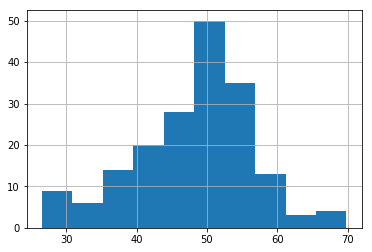

In [303]:
# Votes share distributions of BJP
data[(data['W_Party']=='BJP')]['Winner%'].hist()

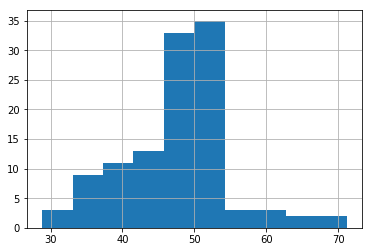

In [304]:
# Votes share distributions of INC
data[(data['W_Party']=='INC')]['Winner%'].hist()

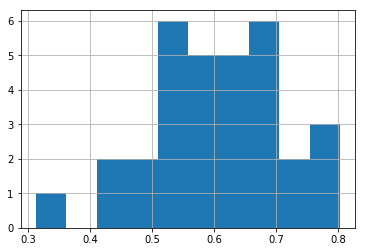

In [306]:
#turnout distribution
states['Turnout'].hist()

In [341]:
#Results by state
party_wins_state = winners.groupby(['STATE','PARTY']).size()
party_wins_state

STATE              PARTY     
A&N ISLANDS        BJP            1
ANDHRA PRADESH     AIMIM          1
                   BJP            7
                   INC            5
                   TDP           29
ARUNACHAL PRADESH  INC            2
ASSAM              BJP            2
                   CPI(ML)(L)     1
                   INC           10
                   IND            1
BIHAR              BJP           23
                   CPM            1
                   INC            4
                   IND            1
                   JD(U)         18
                   RJD            7
CHANDIGARH         INC            1
D&N HAVELI         IND            1
DAMAN & DIU        INC            1
GOA                BJP            2
GUJARAT            BJP           20
                   INC            6
HARYANA            BJP            5
                   INLD           5
HIMACHAL PRADESH   BJP            3
                   HVC            1
JAMMU & KASHMIR    BJP            

In [342]:
winners

,STATE,PC,NAME,SEX,PARTY,VOTES,ELECTORS
56777,A&N ISLANDS,A&N ISLANDS,BISHNU PADA RAY,M,BJP,76891,247384.0
56782,ANDHRA PRADESH,ADILABAD,DR. S. VENUGOPAL CHARY,M,TDP,390308,1094868.0
56789,ANDHRA PRADESH,AMALAPURAM,GANTI MOHANACHANDRA BALAYOGI,M,TDP,368476,908257.0
56794,ANDHRA PRADESH,ANAKAPALLI,GANTA SRINIVASA RAO,M,TDP,392984,1035708.0
56798,ANDHRA PRADESH,ANANTAPUR,KALAVA SRINIVASULU,M,TDP,378488,1226314.0
56803,ANDHRA PRADESH,BAPATLA,D. RAMA NAIDU,M,TDP,399596,1077815.0
56810,ANDHRA PRADESH,BHADRACHALAM,DUMPA MARY VIJAYA KUMARI,F,TDP,293593,1085536.0
56816,ANDHRA PRADESH,BOBBILI,BOTCHA SATYANARAYANA,M,INC,339768,949773.0
56820,ANDHRA PRADESH,CHITTOOR,NOOTHANA KALVA RAMAKRISHNA REDDY,M,TDP,419208,1140219.0
56825,ANDHRA PRADESH,CUDDAPAH,VIVEKANANDA REDDY Y.S.,M,INC,367833,1090670.0


In [397]:
state_data = pd.pivot_table(winners, values=['PC'], index=['STATE','PARTY'], aggfunc=[len])
state_data

len
                              PC
STATE             PARTY         
A&N ISLANDS       BJP          1
ANDHRA PRADESH    AIMIM        1
                  BJP          7
                  INC          5
                  TDP         29
ARUNACHAL PRADESH INC          2
ASSAM             BJP          2
                  CPI(ML)(L)   1
                  INC         10
                  IND          1
BIHAR             BJP         23
                  CPM          1
                  INC          4
                  IND          1
                  JD(U)       18
                  RJD          7
CHANDIGARH        INC          1
D&N HAVELI        IND          1
DAMAN & DIU       INC          1
GOA               BJP          2
GUJARAT           BJP         20
                  INC          6
HARYANA           BJP          5
                  INLD         5
HIMACHAL PRADESH  BJP          3
                  HVC          1
JAMMU & KASHMIR   BJP          2
                  JKN          4
KARNATAKA         BJP          7
                  INC         18
...                           ..
PUNJAB            INC          8
                  SAD          2
                  SAD(M)       1
RAJASTHAN         BJP         16
                  INC          9
SIKKIM            SDF          1
TAMIL NADU        ADMK        10
                  BJP          4
                  CPM          1
                  DMK         12
                  INC          2
                  MADMK        1
                  MDMK         4
                  PMK          5
TRIPURA           CPM          2
UTTAR PRADESH     ABLTC        2
                  BJP         29
                  BSP         14
                  INC         10
                  IND          1
                  RLD          2
                  SJP(R)       1
                  SP          26
WEST BENGAL       AITC         8
                  BJP          2
                  CPI          3
                  CPM         21
                  FBL          2
                  INC          3
                  RSP          3

[90 rows x 1 columns]

### Historical Analysis

In [401]:
df.sort_values('YEAR').groupby('PC')['PARTY'].apply(lambda x: x.value_counts()).sort_values(ascending=False)

PC                    
BELGAUM        IND        519
NALGONDA       IND        509
EAST DELHI     IND        314
CHANDNI CHOWK  IND        275
BHIWANI        IND        263
SOUTH DELHI    IND        245
OUTER DELHI    IND        244
CHANDIGARH     IND        223
NEW DELHI      IND        222
ALLAHABAD      IND        218
LUCKNOW        IND        216
KANPUR         IND        211
AMETHI         IND        208
AGRA           IND        205
DELHI SADAR    IND        199
INDORE         IND        195
MUZAFFARPUR    IND        191
NAGPUR         IND        183
SECUNDERABAD   IND        182
DHANBAD        IND        178
AURANGABAD     IND        177
PUNE           IND        173
GONDA          IND        172
MAHARAJGANJ    IND        163
PATNA          IND        163
JAIPUR         IND        162
BHOPAL         IND        159
HISSAR         IND        159
RAE BARELI     IND        158
ROHTAK         IND        157
                         ... 
MADHA          BSP          1
               KM